<img src="https://en.kntu.ac.ir/wp-content/uploads/2023/05/kntu.png" alt="jjj" style="width: 200px; height: auto; margin-left: 365px; margin-top: 30px;">

<hr style="height: 1px">

<h1 style="font-size: 17PX; text-align: center;">ENGINERING MATHEMATIC</h1>

<h1 style="font-size: 17PX; text-align: center;">Dr.shameli</h1>
<br>

<h1 style="font-size: 17PX; text-align: center;">MohammadAmin Mohammadion Shabestari (40122503)</h1>
<h1 style="font-size: 17PX; text-align: center;">Arvin Monshizadeh Vaziri</h1>

<br>
<h1 style="font-size: 17PX; text-align: center;">Fall 2023-2024</h1>
<hr style="height: 1px; ">


# Project 1:

<img src="https://s30.picofile.com/file/8471618642/Screenshot_2024_01_17_042952.png" alt="jjj" style="width: 1000px; height: 1000; margin-left: 0px; margin-top: 30px;">

<hr style="height: 1px; ">
<br>
<br>

Laplaces Equation:

$$\nabla^2 V=0$$

everywhere in the square. We are in 2D, so this means

$$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}=0$$

This equation can be discretely approximated as

$$\frac{V(x_{i+1}, y_j) - 2V(x_i, y_j) + V(x_{i-1}, y_j)}{(\Delta x)^2} + \frac{V(x_i, y_{j+1}) - 2V(x_i, y_j) + V(x_i, y_{j-1})}{(\Delta y)^2} = 0 $$

Noting that $ \Delta x = \Delta y$ in our array, we can solve for $V(x_i, y_j)$ yielding

$$V(x_i, y_j) = \frac{1}{4}(V(x_{i+1}, y_{j}) + V(x_{i-1}, y_{j}) + V(x_{i}, y_{j+1}) + V(x_{i}, y_{j-1}))$$

So the idea is that if repeatedly set

$$V(x_i, y_j) \to \frac{1}{4}(V(x_{i+1}, y_{j}) + V(x_{i-1}, y_{j}) + V(x_{i}, y_{j+1}) + V(x_{i}, y_{j-1}))$$

$V$ will eventually converge to the true solution

#  Importing necessary libraries 

#### we use numpy to apply variety of mathematical operations on matrixed and arrays!
#### we use matplot for visualizations in Python!

In [43]:
import numpy as np
import matplotlib.pyplot as plt

##  In the initial step of the computational simulation, the boundaries of the computational domain are defined.

the extent along the x-axis spans from 0 to 2, while the spatial extent along the y-axis similarly ranges from 0 to 2.

In [44]:
a = 2
b = 2

Within this domain, a square region is delineated with its lower-left corner located at coordinates (0.5, 0.5) and its upper-right corner positioned at coordinates (1.5, 1.5). 

In [45]:
x0 = 0.5
y0 = 0.5
c = 1
d = 1

In accordance with the spatial specifications illustrated in the provided diagram, the foundational parameters for the computational domain and the coaxial square have been established

![jjj](https://s31.picofile.com/file/8471617668/Screenshot_2024_01_17_020657.png)

# Define the number of grid points

The variables nx and ny represent the number of grid points along the x and y axes, respectively. They affect the resolution of the numerical solution. Increasing the values of **nx** and **ny** will enhance the accuracy of the solution, but also increase the computational time.

In [46]:
nx , ny = 101,101

# Find the distance between two grid points in each direction


The variables **dx** and **dy** represent the grid spacing along the x and y directions, respectively. These grid spacings are ascertained through a systematic calculation, achieved by dividing the **domain lengths** by the **respective number** of grid points **minus one**. 

**but why minus one?**

###  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Example:  
if you have 5 grid points along the x-axis, then you have 4 intervals between them. The length of each interval is dx = a / 4. Similarly, if you have 5 grid points along the y-axis, then you have 4 intervals between them. The length of each interval is dy = b / 4.


In [47]:
dx = a / (nx - 1)
dy = b / (ny -1)
dx,dy

(0.02, 0.02)

# Create potential function v(x,y)

Utilizing the NumPy library, an array of dimensions (xn, ny) is instantiated, with the elements initialized to a predefined initial value. In this specific instance, a value of zero has been assigned as the initial state.



In [48]:
v = np.zeros((nx,ny))
v.shape , v

((101, 101),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

# Boundary conditions  
**x_start**, **x_end**, **y_start**, and **y_end** are indices used to specify our coaxial box in the 2D array v 

The division of **x0** and **y0** by **dx** and **dy**, respectively, serves the purpose of determining the number of grid points from the origin to the commencement of the region of interest along each respective axis. 
This calculation results in **x_start** and **y_start**, which signify the starting coordinates of the specified box within the 2D array v.

Similarly, the division of **x0 + c** and **y0 + d** by **dx** and **dy**, respectively, is performed to ascertain the coordinates corresponding to the conclusion of the region of interest. This computation results  as **x_end** and **y_end**. The objective is to ensure that the designated box encapsulates the prescribed dimensions (c along the x-axis and d along the y-axis).

In [49]:
x_start = int(x0 / dx)
x_end = int((x0 + c) / dx)
y_start = int(y0 / dy)
y_end = int((y0 + d) / dy)

x_start, x_end, y_start, y_end

(25, 75, 25, 75)

**we allocate the value of variable "v" to the region wherein box is situated**

(we allocated 100 as v)

In [50]:
v[x_start:x_end,y_start:y_end] = 100

# Iterative numerical solution to Laplace Equation 

In the context of numerical solutions to partial differential equations, an iterative approach is to update the values within the grid. Specifically, the Jacobi method is commonly utilized to update each grid point based on the average of its neighbors. 

the jaccobi method:


$$V(x_i, y_j) \to \frac{1}{4}(V(x_{i+1}, y_{j}) + V(x_{i-1}, y_{j}) + V(x_{i}, y_{j+1}) + V(x_{i}, y_{j-1}))$$

**Why does this method use iteration?** It's obvious that we should iterate over various points on our grid to explore all their potential. So, we iterate over the x-axis and y-axis.



The point is that the higher number of iterations contributes to have more accurate answer. That is the reason we set iterative number.




<!-- Image 1 -->
<div style="display: inline-block; text-align: center; margin: 15px;">
    <img src="https://s30.picofile.com/file/8471618342/Screenshot_2024_01_17_032623.png" alt="Image 1" style="width: 200px; height: 200px;">
    <br>
    <strong>iterative_number = 1</strong>
</div>

<!-- Image 2 -->
<div style="display: inline-block; text-align: center; margin: 15px;">
    <img src="https://s31.picofile.com/file/8471618368/Screenshot_2024_01_17_032715.png" alt="Image 2" style="width: 200px; height: 200px;">
    <br>
    <strong>iterative_number = 10</strong>
</div>

<!-- Image 3 -->
<div style="display: inline-block; text-align: center; margin: 15px;">
    <img src="https://s30.picofile.com/file/8471618376/Screenshot_2024_01_17_032803.png" alt="Image 3" style="width: 200px; height: 200px;">
    <br>
    <strong>iterative_number = 50</strong>
</div>

<!-- Image 4 -->
<div style="display: inline-block; text-align: center; margin: 15px;">
    <img src="https://s30.picofile.com/file/8471618384/Screenshot_2024_01_17_034158.png" alt="Image 4" style="width: 200px; height: 200px;">
    <br>
    <strong>iterative_number = 1000</strong>
</div>


In [57]:
iterative_number = 1000
for i in range(iterative_number):
    for ii in range(1,nx-1):
        for jj in range(1,ny-1):
            v[ii,jj] = 0.25 * (v[ii + 1, jj] + v[ii - 1, jj] + v[ii, jj + 1] + v[ii, jj - 1])

# Visualization

**linspace:** we use this numpy function to create X_axis and Y_axis. Here as the instance, we created an array of nx numbers from 0 to a.

**meshgrid:** we use this numpy function to create X and Y matrices from coordinates.

**contourf:** this function is related to matplotlib! It is used to plot a color map. 


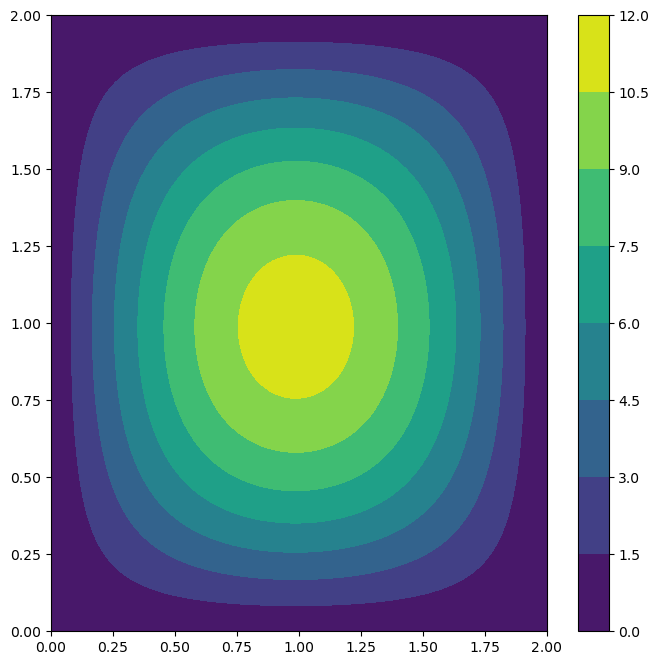

In [58]:
X_axis = np.linspace(0, a, nx)
Y_axis = np.linspace(0, b, ny)
X,Y = np.meshgrid(X_axis,Y_axis)

plt.figure(figsize=(8,8))
plt.contourf(X,Y,v,cmap='viridis')
plt.colorbar()
plt.show()

# Plot in 3D

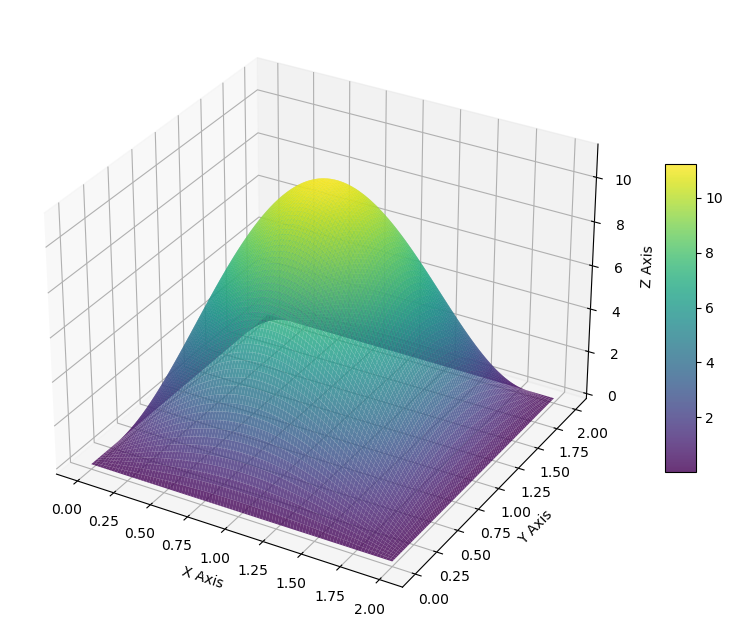

In [64]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, v, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)

cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()


<br>
<br>
<br>
<br>
<br>
<br>
<hr style="height: 1px; ">
<br>
<br>
<br>
<br>
<hr style="height: 1px; ">

# Project 2:

<img src="https://s30.picofile.com/file/8471618734/Screenshot_2024_01_17_045545.png" alt="jjj" style="width: 1000px; height: 1000; margin-left: 0px; margin-top: 30px;">

<hr style="height: 1px; ">
<br>
<br>

## Exponential  Fourier Series Formula

The Exponential Fourier series representation of a function \( f(x) \) is given by:

$$ f(t) = \sum_{n=-\infty}^{\infty} c_n e^{i \frac{2\pi n}{T} t}
 $$

where:

$$ c_n = \frac{1}{T} \int_{0}^{T} f(t) e^{-i \frac{2\pi n}{T} t} \, dt 
$$



#### We actually are going to find the exponential fourie series of step function.

Consider the step function defined as:

f(x) = \begin{cases} 1 & \text{if } x > 0 \\ -1 & \text{if } x < 0 \end{cases}

The function is periodic with period \( T = 2 \) (since the function repeats every 2 units from -1 to 1).

###  Calculate \( c_n for n = 0 \):


$$
c_0 = \frac{1}{T} \int_{0}^{T} dt = \frac{1}{T} [t]_{0}^{T} = \frac{1}{T} T = 1 
$$


###  Calculate \( c_n for n != 0 \):

$$c_n = \frac{1}{T} \int_{0}^{T} e^{-i \frac{2\pi n}{T} t} \, dt$$




#### In python, there is no need to define all those calculations! 
#### we can use **sympy**, **numpy** and **matplotlib**!      

<br>


At first, import them:

In [7]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

The variable of our calculation is **t**. To ensure that **t** is recognized as a symbolic variable, we define it using the sympy library. This allows us to convey that **t** is a symbol with specific mathematical properties, ensuring that any occurrence of **t** in the code is interpreted as a variable involved in mathematical operations.




In [66]:
t = sym.symbols('t')

In sympy, **the Piecewise function** is used to define a piecewise-defined function. A piecewise function is a function that is defined by different expressions or formulas on different intervals.

The Piecewise function in sympy allows you to specify different expressions for different intervals or conditions.

In [67]:
x = sym.Piecewise((1 , t > 0),(-1 , t < 0))
x

Piecewise((1, t > 0), (-1, t < 0))

If we compute the coefficients of the exponential Fourier series, 
cn is equal to 1 when n = 0;

For \(n = 0\), \(c_n = 1\), and for other values of \(n\):
$$ c_n = \frac{1}{n \pi} \left(1 - (-1)^{\frac{n}{2}}\right) $$


the following function, named **c_n** will calculate the coefficients

In [68]:
def c_n(n):
    if n == 0:
        return 1
    else:
        return (1 / (n * np.pi)) * (1 - (-1)**(n//2))


Here, we are going to calculate the exponential fourier series!

as far as we all know, the exponential fourier series is calculated through the following formula:

$$ f(t) = \sum_{n=-\infty}^{\infty} c_n e^{i \frac{2\pi n}{T} t}
 $$
 
Hence, a function is defined in which calculates the series base on this formula!

**we wanted the answers from n = -25 to n =25! due to that we use a loop to calculate all the summations needed**

this function gets **t** as the input:

In [69]:
def expo_fourier_series(t):
    s_sum = sum(c_n(n) * np.exp(1j * 2 * np.pi * n * t) for n in range(-25, 25 + 1))
    return s_sum


In order to visualise the answer, we create an array from t = 1 to t = -1 with 1000 values between them. (**The more the number of values in the series, the more accurate the representation of the Gibbs phenomenon.**)

In [70]:
t = np.linspace(-1, 1, 1000)
final = expo_fourier_series(t)
final


array([0.48777529+4.85776921e-15j, 0.48842426+1.99102565e-01j,
       0.49030267+3.91697260e-01j, 0.49321219+5.71660025e-01j,
       0.49684549+7.33607406e-01j, 0.50081853+8.73201378e-01j,
       0.50471088+9.87381261e-01j, 0.50810996+1.07450733e+00j,
       0.51065454+1.13440745e+00j, 0.51207287+1.16832539e+00j,
       0.51221156+1.17877670e+00j, 0.51105203+1.16932494e+00j,
       0.50871288+1.14429650e+00j, 0.50543789+1.10845660e+00j,
       0.50157071+1.06667111e+00j, 0.49751908+1.02357941e+00j,
       0.49371207+9.83301553e-01j, 0.49055492+9.49200008e-01j,
       0.48838623+9.23710813e-01j, 0.4874418 +9.08253535e-01j,
       0.48782925+9.03222670e-01j, 0.48951584+9.08056766e-01j,
       0.49233107+9.21375621e-01j, 0.49598377+9.41170987e-01j,
       0.50009196+9.65032619e-01j, 0.50422255+9.90389611e-01j,
       0.50793668+1.01474669e+00j, 0.51083599+1.03589660e+00j,
       0.51260508+1.05209264e+00j, 0.5130455 +1.06216952e+00j,
       0.51209783+1.06560568e+00j, 0.50984923+1.0625253

 The real part is taken because the imaginary part should be zero for real-valued functions. 
 

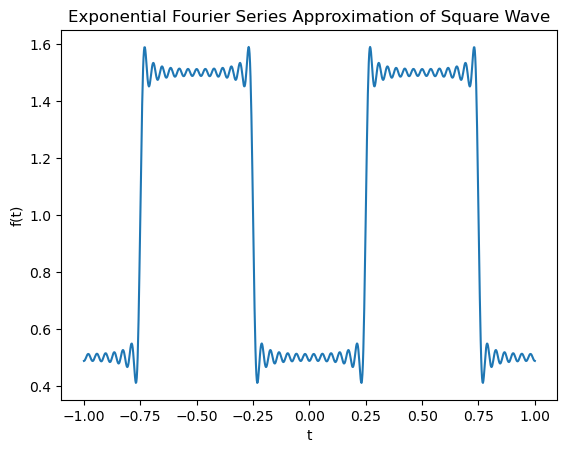

In [71]:
plt.plot(t, np.real(final))
plt.title('Exponential Fourier Series Approximation of Square Wave')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()


<br>
<br>
<br>
<br>
<br>
<br>
<hr style="height: 1px; ">
<br>
<br>
<br>
<br>
<hr style="height: 1px; ">

# Project 3:

<img src="https://s30.picofile.com/file/8471626126/Screenshot_2024_01_17_110427.png" alt="jjj" style="width: 1000px; height: 1000; margin-left: 0px; margin-top: 30px;">

<hr style="height: 1px; ">
<br>
<br>

# Integration of Fourier Signal!

### Fourier Series Formulas

When the periodicity \( T \) goes to infinity, the Fourier series can be expressed as:

$$
\lim_{{T \to \infty}} \left( a_0 + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi nx}{T}\right) + b_n \sin\left(\frac{2\pi nx}{T}\right) \right)  \right) = \int_{{0}}^{\infty} \left( A(w)\cos(wt) + B(w)\sin(wt) \right) \,dw
$$

### Coefficient Formulas

The coefficients \( A(w) \) and \( B(w) \) are given by the following integrals:

$$
A(w) = \frac{1}{\pi} \int_{{-\infty}}^{\infty} f(t) \cos(wt) \,dt
$$

$$
B(w) = \frac{1}{\pi} \int_{{-\infty}}^{\infty} f(t) \sin(wt) \,dt
$$



###  Simplification for $\cos(t)$ which is related to this question

For $\cos(t)$ being an even function:

$$
 \int_{0}^{\infty} \left( \frac{1}{\pi} \int_{-\infty}^{\infty} cos(t) \cos(wt) \,dt \right) \cos(wt) + \left( \frac{1}{\pi} \int_{-\infty}^{\infty} cos(t) \sin(wt) \,dt \right) \sin(wt) \,dw
$$


<br>
<br>  

In this section, we will utilize the **sympy** library. Let's begin by importing it:

In [8]:
import sympy as sym

In the entire process of calculating the Fourier series integration for the function **cos(x)**, it is essential to define the two variables involved in our formulas. Let's proceed by specifying these variables:

In [9]:
w , x = sym.symbols('w x',real = True)

We are working with a **piecewise function**, where the function is defined as cos(x) during certain intervals of x and is zero during other intervals. To handle this piecewise behavior, we are utilizing the **Piecewise** function provided by the sympy library:

In [10]:
f = sym.Piecewise((sym.cos(x), (x > 0) & (x < sym.pi)), (0, (x <= 0) | (x >= sym.pi)))
f

Piecewise((cos(x), (x > 0) & (x < pi)), (0, (x >= pi) | (x <= 0)))

As previously explained, the function is **cos(x)**. Consequently, the coefficients **B(w)** associated with the sine terms in the Fourier series are determined to be 
$$
B(w) = \frac{1}{\pi} \int_{-\infty}^{\infty} cos(x) \sin(wx) \,dx$$
while the coefficients **A(w)** corresponding to the cosine terms are established as:

$$
A(w) = \frac{1}{\pi} \int_{{0}}^{\infty} cos(x) \cos(wx) \,dx
$$

In [11]:
A_w = (1 / sym.pi) * sym.integrate((f * sym.cos( w * x)), (x , 0, sym.pi))
A_w

Piecewise((pi/2, Eq(w, -1) | Eq(w, 1)), (-w*sin(pi*w)/(w**2 - 1), True))/pi

In [12]:
B_w = (1 / sym.pi) * sym.integrate((f * sym.sin( w * x)), (x , 0, sym.pi))
B_w

Piecewise((0, Eq(w, -1) | Eq(w, 1)), (w*cos(pi*w)/(w**2 - 1) + w/(w**2 - 1), True))/pi

Ultimately, all the coefficients are incorporated into the main formula, which is subjected to integration with respect to the variable w.

In [13]:
result = sym.integrate(A_w * sym.cos(w * x) + B_w * sym.sin(w * x), (w, 0, 25))
result

-(Integral(w*sin(w*x)/(w**2 - 1), (w, 0)) + Integral(-w*sin(pi*w)*cos(w*x)/(w**2 - 1), (w, 0)) + Integral(w*sin(w*x)*cos(pi*w)/(w**2 - 1), (w, 0)))/pi + (Integral(w*sin(w*x)/(w**2 - 1), (w, 25)) + Integral(-w*sin(pi*w)*cos(w*x)/(w**2 - 1), (w, 25)) + Integral(w*sin(w*x)*cos(pi*w)/(w**2 - 1), (w, 25)))/pi

In the following code, I've utilized numerical methods to generate a plot of the results. While symbolic computation libraries like SymPy enable straightforward display of formulas and solutions, they are not designed for plotting. Therefore, I wrote the following code for numerical techniques to easily visualize it.

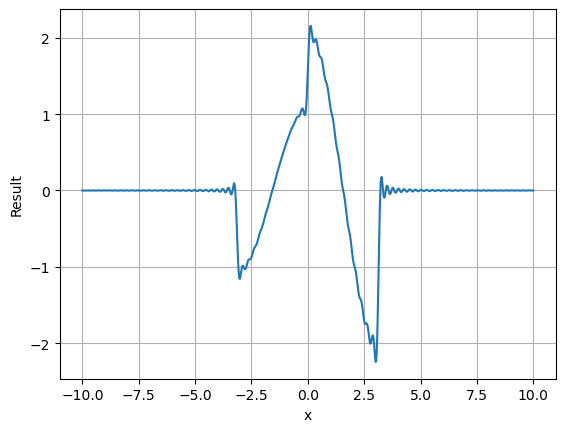

In [33]:
import numpy as np
import matplotlib.pyplot as plt
def A_w(w):
    return np.where((w == -1) | (w == 1), 1/2, -w * (np.sin(np.pi * w)) / (w**2 - 1))
def B_w(w):
    return np.where((w == -1) | (w == 1), 0, (w*(np.cos(np.pi*w)) + w)/((w**2 - 1)*np.pi))
def result(x):
    w = np.linspace(0, 25, 1000)
    return np.trapz((A_w(w) * np.cos(w * x) + B_w(w) * np.sin(w * x)), w)
x_ = np.linspace(-10, 10, 1000)
y_ = np.array([result(x) for x in x_])
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('Result')
plt.grid(True)
plt.show()


<br>
<br>
<br>
<br>
<br>
<br>
<hr style="height: 1px; ">
<br>
<br>
<br>
<br>
<hr style="height: 1px; ">

# Project 4:

<img src="https://s31.picofile.com/file/8471631884/Screenshot_2024_01_17_1342441111111.png" alt="jjj" style="width: 1000px; height: 1000; margin-left: 0px; margin-top: 30px;">

<hr style="height: 1px; ">
<br>
<br>

#### The transformation of ( w = 1 / z ) is a special case of complex transformation.


## Transformation \(w = 1/z)

1. **Definition of the Transformation:**
   - \(z\) is a complex number of the form \(z = x + yi\), where \(x\) and \(y\) are real numbers, and \(i\) is the imaginary unit (\(i^2 = -1\)).
   - \(w\) is another complex number obtained by taking the reciprocal of \(z\): $$w = \frac{1}{z} = \frac{1}{x + yi}$$.

2. **Inversion Operation:**
   - The transformation w = 1 / z essentially performs an inversion operation in the complex plane. Each point \(z\) in the complex plane is mapped to its reciprocal \(w\).

3. **Effect on the Magnitude:**
   - If \(z = x + yi\), then the magnitude (or modulus) of \(z\) is given by $(z = \sqrt{x^2 + y^2})$.
   - The magnitude of \(w\) is given by $(|w| = \frac{1}{|z|})$. This means that points closer to the origin in the complex plane are mapped to points farther away and vice versa.

4. **Effect on Angles:**
   - The argument (angle) of \(z\) is denoted by $(\text{arg}(z))$, and the argument of \(w\) is given by $(\text{arg}(w) = -\text{arg}(z))$. The angle of the transformed point is the negative of the angle of the original point.

5. **Mapping Points at Infinity:**
   - If \(z\) approaches infinity, \(w\) approaches zero. Conversely, if \(z\) approaches zero, \(w\) goes to infinity.

6. **Geometric Interpretation:**
   - Geometrically, the transformation $(w = \frac{1}{z})$ reflects points across the unit circle (circle with radius 1) in the complex plane. Points inside the unit circle are mapped outside, and vice versa.

7. **Application to Circles:**
   - In the context of circles, the transformation $(w = \frac{1}{z})$ maps circles centered at the origin to lines passing through the origin and vice versa.

In the specific case of plotting the circle $((x+2)^2 + (y-2)^2 = 8)$ and its transformation under $(w = \frac{1}{z})$, the transformation will map the circle to a line, and the geometric relationships described above will be evident in the plot.


<hr style="height: 1px; ">

First, we import the libraries:

In [69]:
import matplotlib.pyplot as plt
import numpy as np

circle with z function is returning the circle given in the question!
**x** is our **real** part in complex numbers and **yi** is **imaginary part**. 

In [41]:
def circle_with_z(z):
    return (z.real + 2)**2 + (z.imag - 2)**2 - 8

here is the definition of x-axis and y-axis using linspace function of numpy

In [46]:
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
Xx , Yy = np.meshgrid(x,y)
Z = Xx + 1j*Yy

we use the tranformation to find the transformation of the circle using **w = 1/z**

In [52]:
W = 1 / Z
circle_with_w = circle_with_z(W)
circle_with_z = circle_with_z(Z)

# Transformed Circle

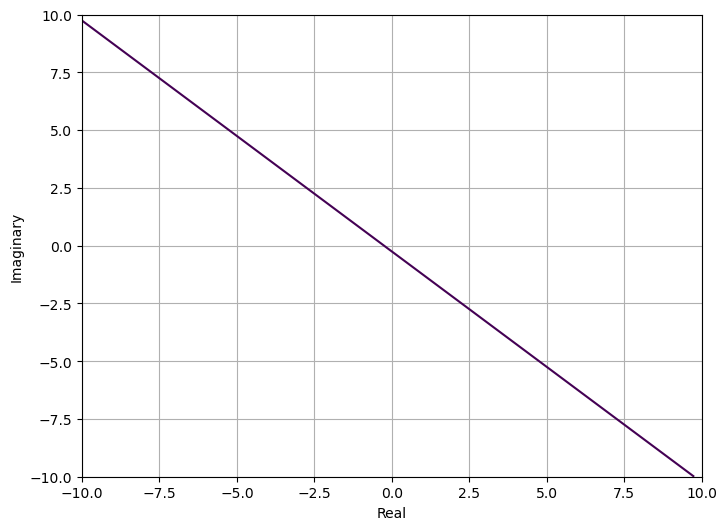

In [67]:
plt.figure(figsize=(8,6))
plt.contour(Xx, Yy, circle_with_w, levels=[0])
plt.xlabel('Real')
plt.ylabel("Imaginary")
plt.grid(True)
plt.show()

# Main circle

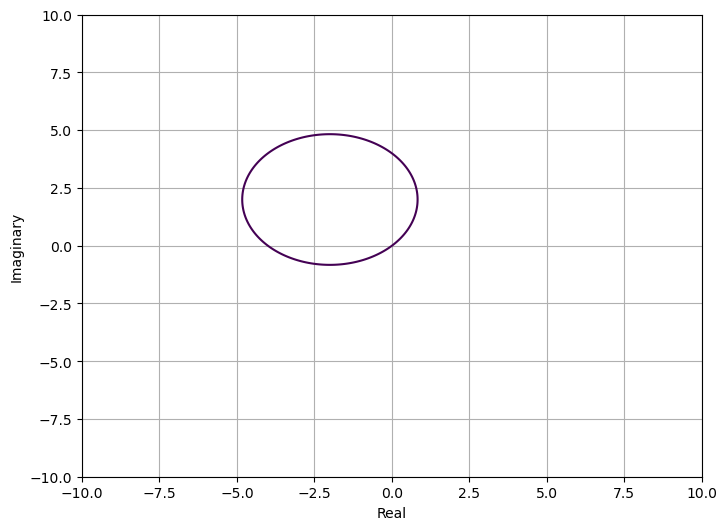

In [68]:
plt.figure(figsize=(8,6))
plt.contour(Xx, Yy, circle_with_z, levels=[0])
plt.xlabel('Real')
plt.ylabel("Imaginary")
plt.grid(True)
plt.show()